In [1]:
import os
import librosa
import noisereduce as nr
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

/home/debashis/works/msc-group-project-audio/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
audio_path = 'datasets/final_final/Bird_1.wav'
y, sr = librosa.load(audio_path, sr=None)

In [5]:
ipd.Audio(audio_path)

In [6]:
# noise reduction
reduced_noise = nr.reduce_noise(y=y, sr=sr, prop_decrease=0.1)

output_file = 'datasets/noise_reduced/Bird_1.wav'
sf.write(output_file, reduced_noise, sr)

In [8]:
ipd.Audio(output_file)

In [10]:
y_nr, sr_nr = librosa.load(output_file, sr=None)

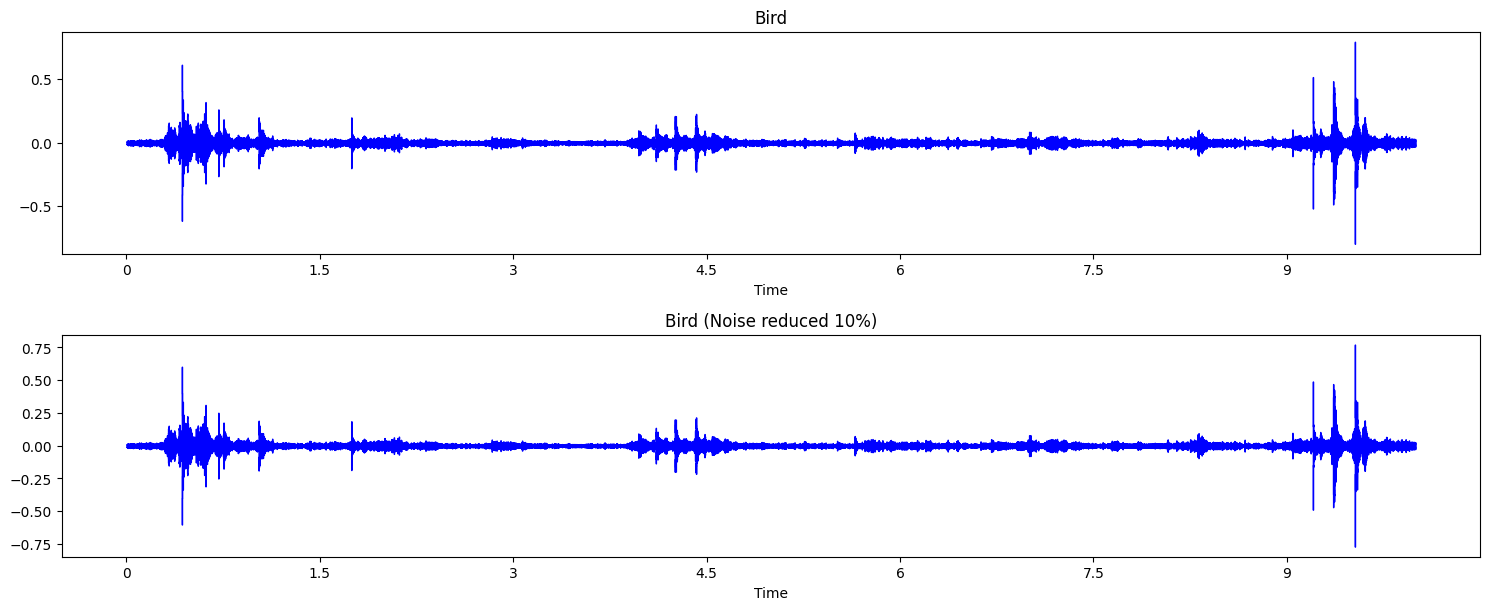

In [18]:
plt.figure(figsize=(15, 30))

plt.subplot(10, 1, 1)
librosa.display.waveshow(y, sr=sr, color="blue")
plt.title("Bird")

plt.subplot(10, 1, 2)
librosa.display.waveshow(y_nr, sr=sr_nr, color="blue")
plt.title("Bird (Noise reduced 10%)")

plt.tight_layout()
plt.show()

In [19]:
HOP_LENGTH = 512
NUM_FFT = 2048
FRAME_SIZE = 1024

In [20]:
y_ms = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=NUM_FFT, hop_length=HOP_LENGTH)
y_nr_ms = librosa.feature.melspectrogram(y=y_nr, sr=sr_nr, n_fft=NUM_FFT, hop_length=HOP_LENGTH)

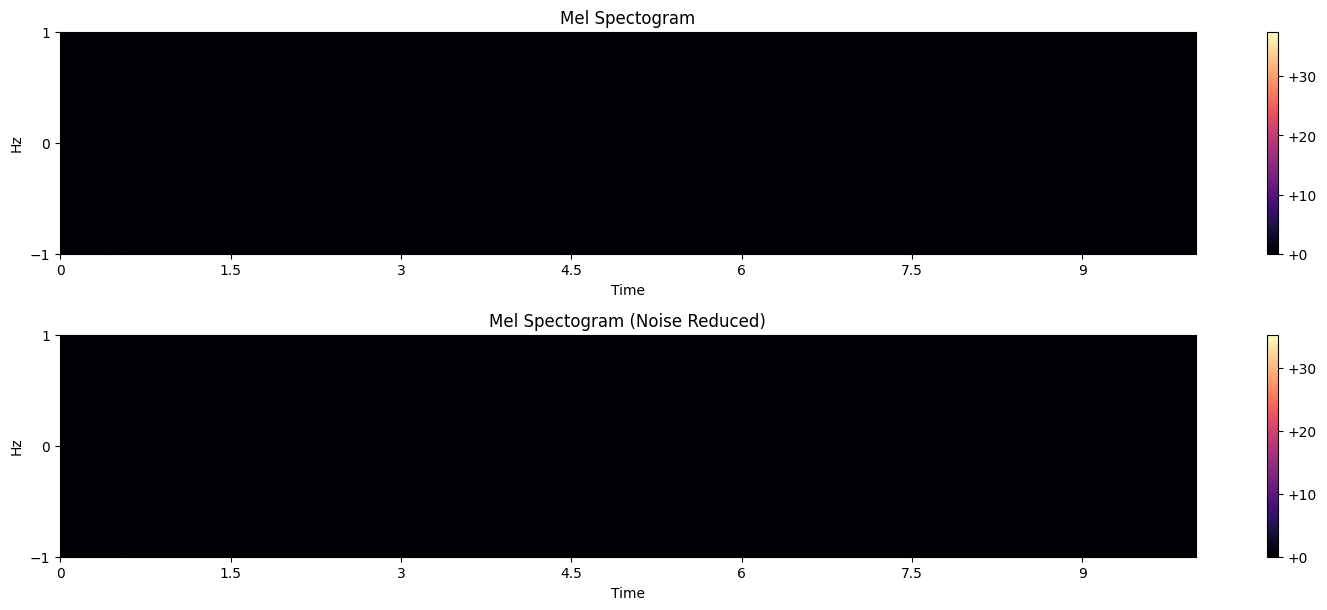

In [21]:
plt.figure(figsize=(15, 30))

plt.subplot(10, 1, 1)
librosa.display.specshow(y_ms, sr=sr, hop_length=HOP_LENGTH, x_axis="time", y_axis="mel")
plt.ylim((-1, 1))
plt.title("Mel Spectogram")
plt.colorbar(format="%+2.f")

plt.subplot(10, 1, 2)
librosa.display.specshow(y_nr_ms, sr=sr_nr, hop_length=HOP_LENGTH, x_axis="time", y_axis="mel")
plt.ylim((-1, 1))
plt.title("Mel Spectogram (Noise Reduced)")
plt.colorbar(format="%+2.f")

plt.tight_layout()
plt.show()

## Noise Reduction for all audio

In [23]:
input_dir = "datasets/final_final"
output_dir = "datasets/noise_reduced"
for filename in os.listdir(input_dir):
  if filename.endswith(".wav"):  # Process only .wav files
    input_path = os.path.join(input_dir, filename)
    output_path = os.path.join(output_dir, filename)

    y, sr = librosa.load(input_path, sr=None)

    # Noise reduction
    reduced_noise = nr.reduce_noise(y=y, sr=sr, prop_decrease=0.1)

    # Save the denoised audio
    sf.write(output_path, reduced_noise, sr)
    print(f"Processed and saved: {output_path}")

Processed and saved: datasets/noise_reduced/Engine_17.wav
Processed and saved: datasets/noise_reduced/Human_42.wav
Processed and saved: datasets/noise_reduced/Human_28.wav
Processed and saved: datasets/noise_reduced/Train-horn_20.wav
Processed and saved: datasets/noise_reduced/Fire-and-trucks_34.wav
Processed and saved: datasets/noise_reduced/Fire-and-trucks_48.wav
Processed and saved: datasets/noise_reduced/Rail-transport_26.wav
Processed and saved: datasets/noise_reduced/Fire-and-trucks_26.wav
Processed and saved: datasets/noise_reduced/Human_40.wav
Processed and saved: datasets/noise_reduced/Vehicle_15.wav
Processed and saved: datasets/noise_reduced/Train-horn_36.wav
Processed and saved: datasets/noise_reduced/Rail-transport_48.wav
Processed and saved: datasets/noise_reduced/Bird_29.wav
Processed and saved: datasets/noise_reduced/Police_13.wav
Processed and saved: datasets/noise_reduced/Human_6.wav
Processed and saved: datasets/noise_reduced/Engine_24.wav
Processed and saved: datase